In [1]:
# Celda 1: Importación de bibliotecas necesarias
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz

# Celda 2: Carga del dataset del Titanic
titanic = sns.load_dataset('titanic')


In [2]:

# Celda 3: Preparación y limpieza de los datos
# Imputación de valores faltantes para la edad
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

In [3]:
# Codificación One-Hot para el género y la clase de pasaje
titanic = pd.get_dummies(titanic, columns=['sex', 'class'], drop_first=True)

In [4]:

# Celda 4: División de datos y entrenamiento del árbol de decisión
X = titanic[['age', 'sex_male', 'class_Second', 'class_Third']]
y = titanic['survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [7]:
# Celda 5: Evaluación del modelo
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 13]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


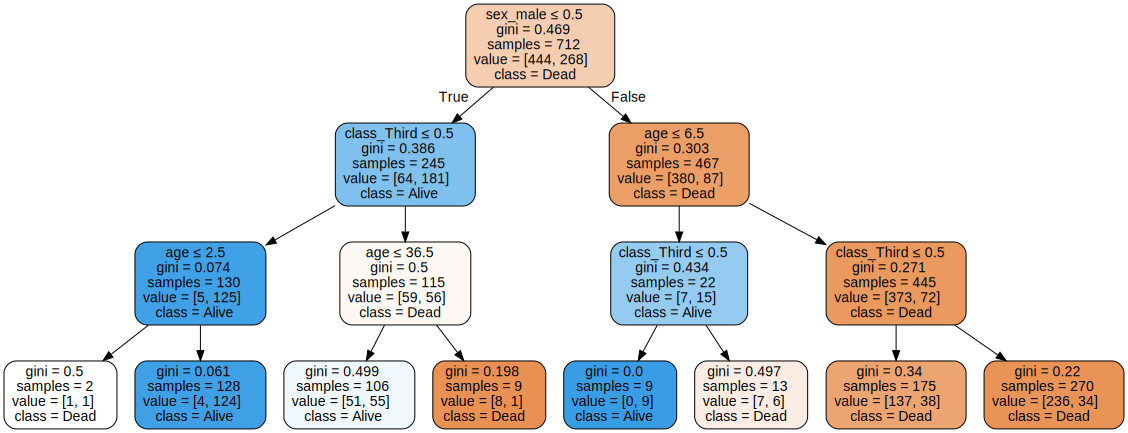

In [8]:
# Celda 6: Visualización con Graphviz
features = X.columns
targets = ['Dead', 'Alive']
data = export_graphviz(tree, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph


In [9]:
# Guardar el gráfico en un archivo PNG
graph.format = 'png'
graph.render(filename='tree_image', directory='./', cleanup=True)


'tree_image.png'